# Autoencoder Demo

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

%matplotlib inline

SEED = 42
np.random.seed(SEED)

In [21]:
data = datasets.fetch_olivetti_faces()

In [22]:
X = data['data']
y = data['target']

In [23]:
X.shape, y.shape, np.unique(y).shape

((400, 4096), (400,), (40,))

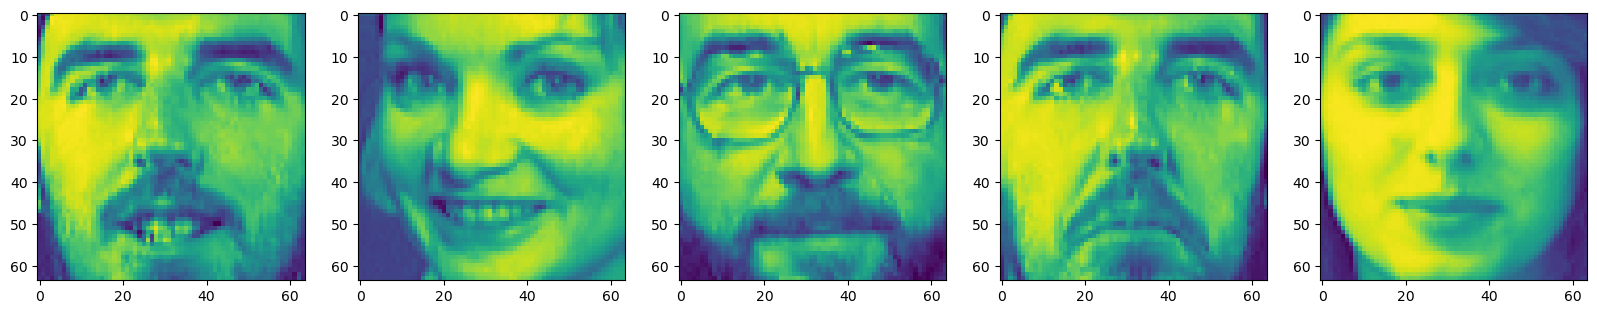

In [24]:
f, ax = plt.subplots(1,5, figsize=(20,10))
for i in range(5):
    ax[i].imshow(X[np.random.choice(len(X))].reshape(64,64))

## 1 PCA

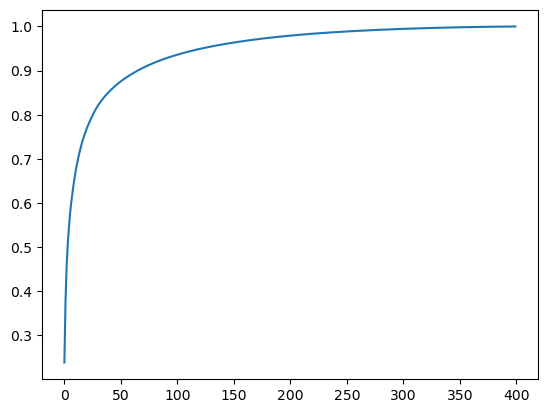

In [25]:
from sklearn.decomposition import PCA


pca = PCA(random_state=SEED, whiten=True).fit(X)

xx = pca.explained_variance_ratio_
xx = np.cumsum(xx)

plt.plot(np.arange(len(xx)), xx)

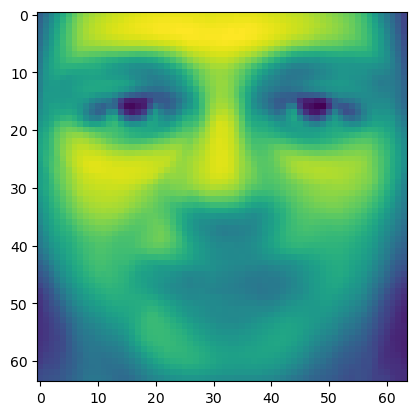

In [26]:
# eigenfaces

plt.imshow(pca.mean_.reshape(64,64))

<Figure size 640x480 with 0 Axes>

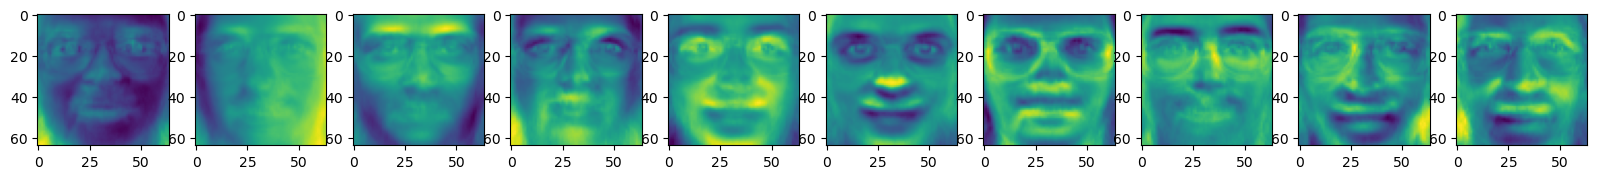

In [27]:
plt.figure(5)
f, ax = plt.subplots(1,10, figsize=(20,20))
for i in range(10):
    ax[i].imshow(pca.components_[i].reshape(64,64))

## 2 TSNE

In [28]:
from sklearn.manifold import TSNE
from sklearn import metrics
from scipy import sparse
from sklearn.feature_extraction.text import TfidfTransformer

import matplotlib as mpl
from ipywidgets import interact, IntSlider, FloatSlider

In [29]:
dist = metrics.pairwise_distances(X, metric='euclidean')
dist.shape

(400, 400)

In [30]:
perplexity_slider = FloatSlider(min=1, max=50, step=5, value=30)
learning_rate_slider = FloatSlider(min=1, max=1000, step=10, value=200)
early_exaggeration_slider = FloatSlider(min=10, max=20, step=1.0, value=12.0)


@interact(
    perplexity=perplexity_slider, 
    learning_rate=learning_rate_slider,
    early_exaggeration=early_exaggeration_slider
)


def plot(perplexity, learning_rate, early_exaggeration):
    
    model = TSNE(n_components=2, 
                 perplexity=perplexity,
                 learning_rate=learning_rate,
                 early_exaggeration=early_exaggeration,
                 metric='precomputed'
                )
    
    xx = model.fit_transform(dist)
    
    plt.figure(figsize=(10,10))
    for label in range(10):
        plt.scatter(xx[y == label,0], xx[y  == label, 1], label = data['target'][label], alpha=0.5)

interactive(children=(FloatSlider(value=30.0, description='perplexity', max=50.0, min=1.0, step=5.0), FloatSli…

## 3 Autoencoders

In [12]:
import torch as tt
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

tt.manual_seed(SEED)

In [13]:
train_loader = DataLoader(X, batch_size=64, shuffle=True)

In [14]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(64*64, 128),
            nn.ELU(),
            nn.Linear(128, 64),
            nn.ELU(),
            nn.Linear(64, 12),
            nn.ELU(),
            nn.Linear(12, 3),   # compress to 3 features which can be visualized in plt
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ELU(),
            nn.Linear(12, 64),
            nn.ELU(),
            nn.Linear(64, 128),
            nn.ELU(),
            nn.Linear(128, 64*64),
            nn.Sigmoid(),       # compress to a range (0, 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [15]:
autoencoder = AutoEncoder()

optimizer = optim.Adam(autoencoder.parameters(), lr=0.001, betas=(0.8,0.99))
loss_func = nn.MSELoss()

n_epochs = 100

In [16]:
# initialize figure

N_TEST_IMG = 3
view_data = tt.FloatTensor(X[np.random.choice(len(X), N_TEST_IMG)])

def plot_data(decoded_data, n_samples=N_TEST_IMG):
    f, ax = plt.subplots(1, n_samples, figsize=(7, 7))
    
    for i in range(N_TEST_IMG):
        ax[i].imshow(np.reshape(decoded_data.data.numpy()[i], (64, 64)), cmap='gray')
        ax[i].set_xticks(())
        ax[i].set_yticks(())
        
    plt.show()

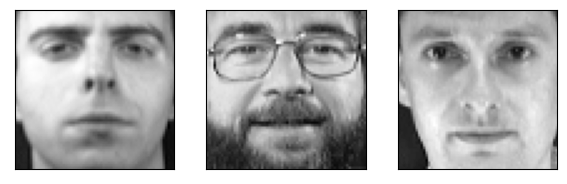

In [17]:
plot_data(view_data)

Epoch:  0 | train loss: 0.0330


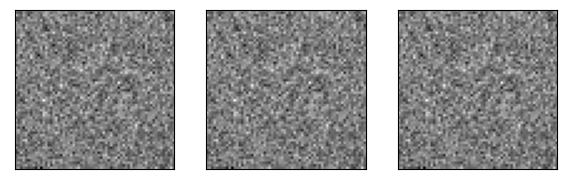

Epoch:  1 | train loss: 0.0263


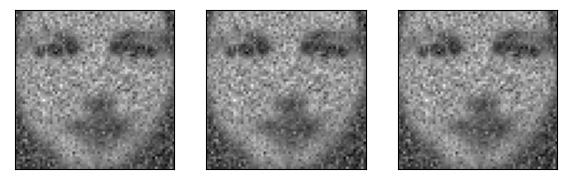

Epoch:  2 | train loss: 0.0194


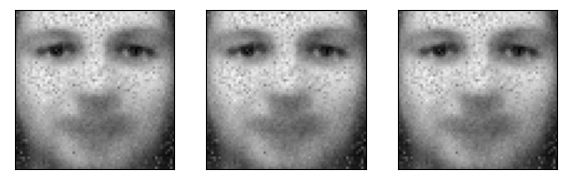

Epoch:  3 | train loss: 0.0201


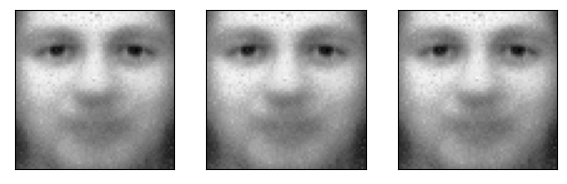

Epoch:  4 | train loss: 0.0176


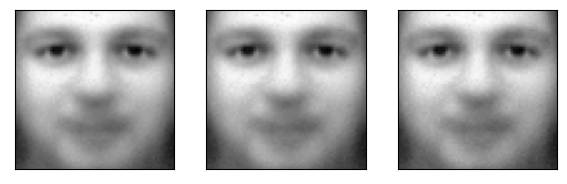

Epoch:  5 | train loss: 0.0180


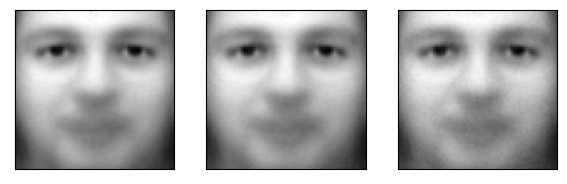

Epoch:  6 | train loss: 0.0194


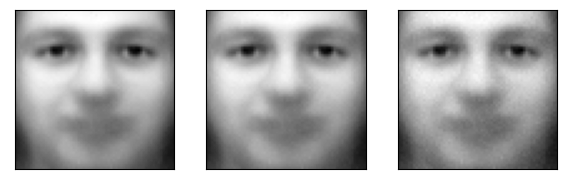

Epoch:  7 | train loss: 0.0178


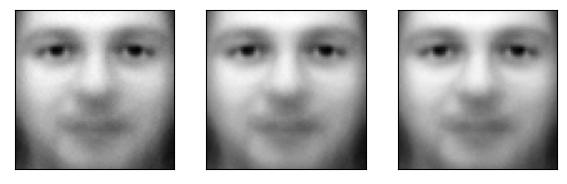

Epoch:  8 | train loss: 0.0183


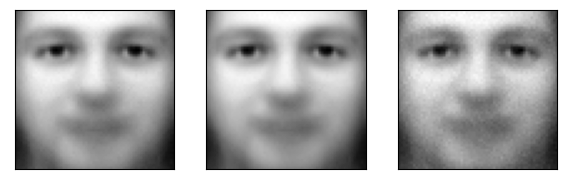

Epoch:  9 | train loss: 0.0174


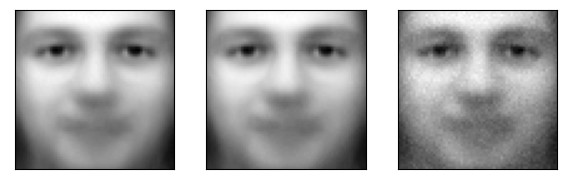

Epoch:  10 | train loss: 0.0155


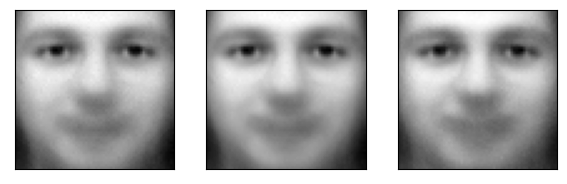

Epoch:  11 | train loss: 0.0157


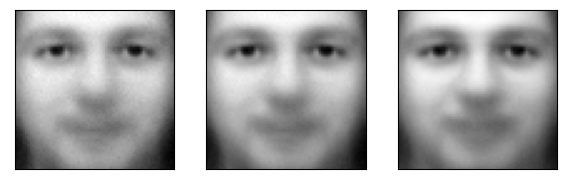

Epoch:  12 | train loss: 0.0161


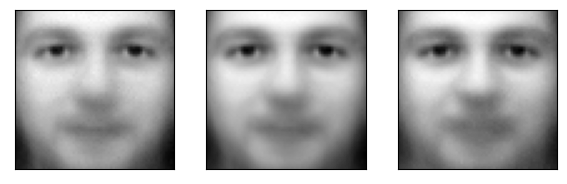

Epoch:  13 | train loss: 0.0160


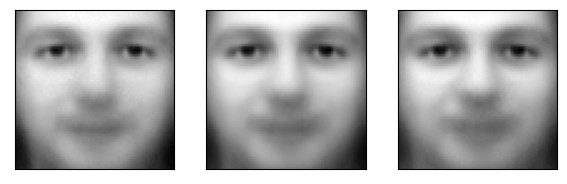

Epoch:  14 | train loss: 0.0160


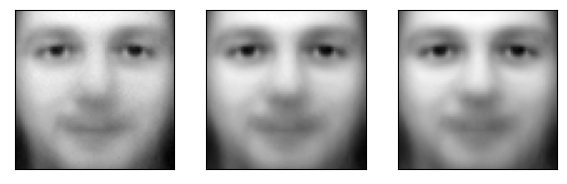

Epoch:  15 | train loss: 0.0144


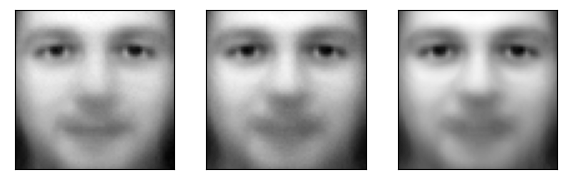

Epoch:  16 | train loss: 0.0146


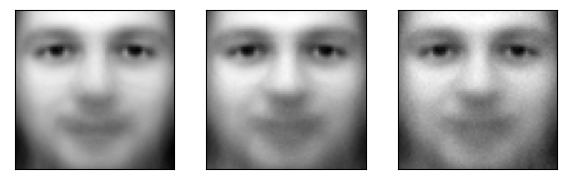

Epoch:  17 | train loss: 0.0137


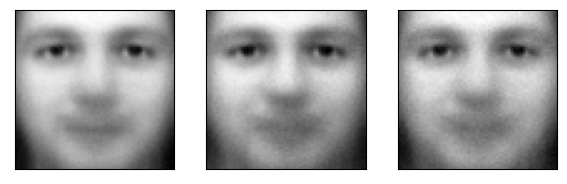

Epoch:  18 | train loss: 0.0136


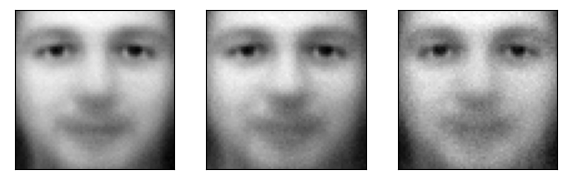

Epoch:  19 | train loss: 0.0130


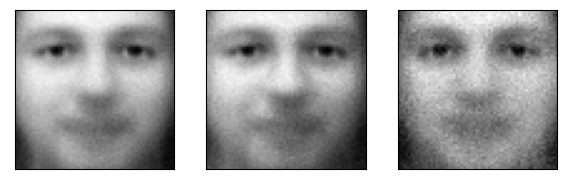

Epoch:  20 | train loss: 0.0134


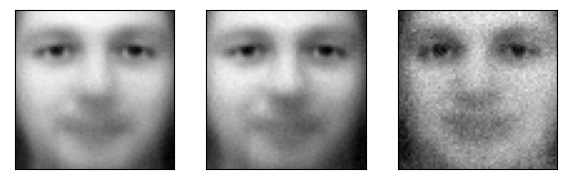

Epoch:  21 | train loss: 0.0133


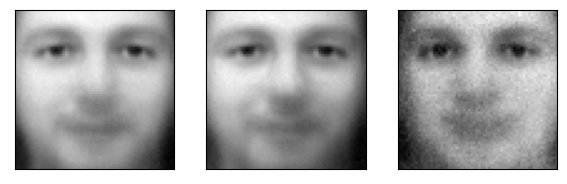

Epoch:  22 | train loss: 0.0128


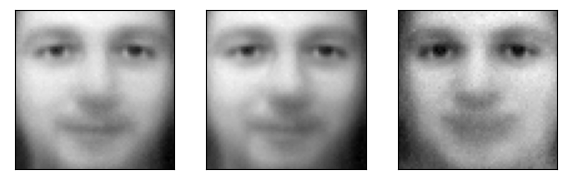

Epoch:  23 | train loss: 0.0126


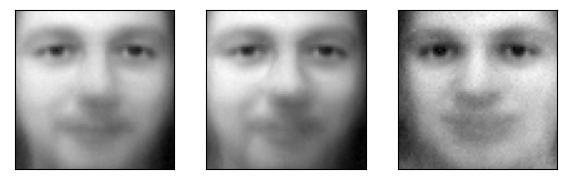

Epoch:  24 | train loss: 0.0121


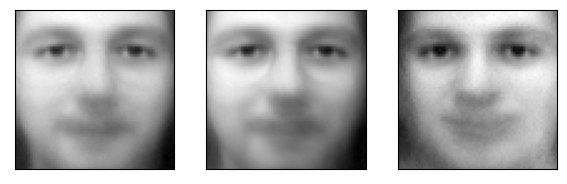

Epoch:  25 | train loss: 0.0131


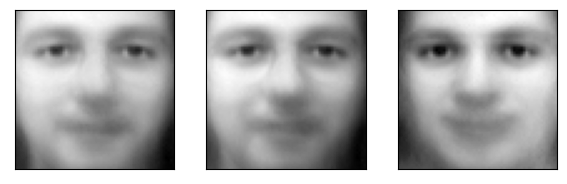

Epoch:  26 | train loss: 0.0127


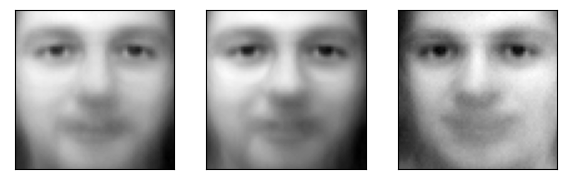

Epoch:  27 | train loss: 0.0124


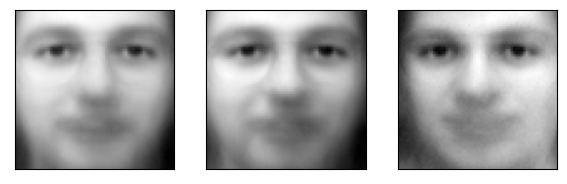

Epoch:  28 | train loss: 0.0123


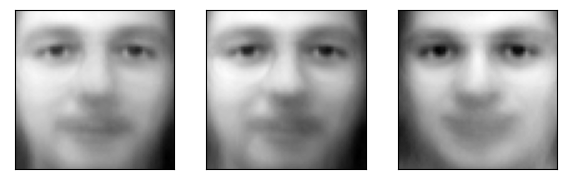

Epoch:  29 | train loss: 0.0128


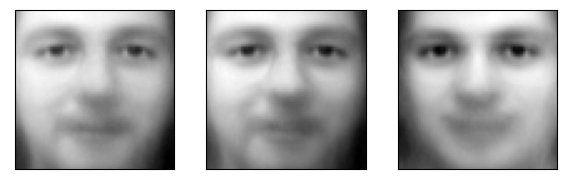

Epoch:  30 | train loss: 0.0121


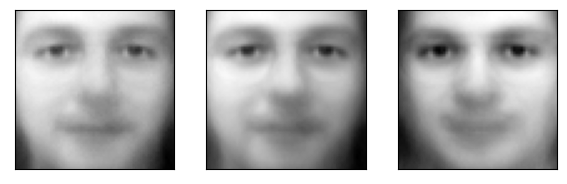

Epoch:  31 | train loss: 0.0129


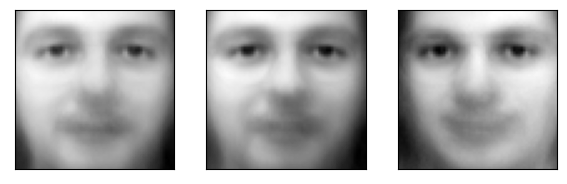

Epoch:  32 | train loss: 0.0115


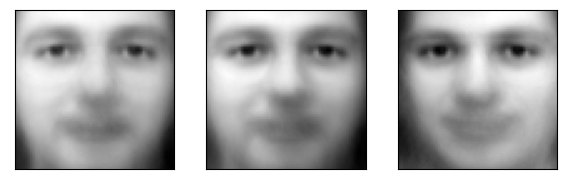

Epoch:  33 | train loss: 0.0109


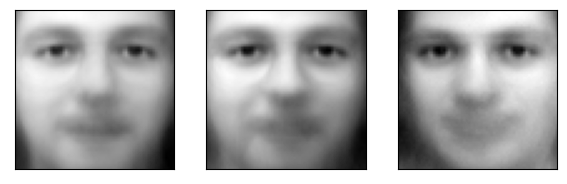

Epoch:  34 | train loss: 0.0120


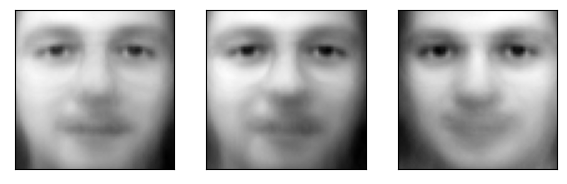

Epoch:  35 | train loss: 0.0115


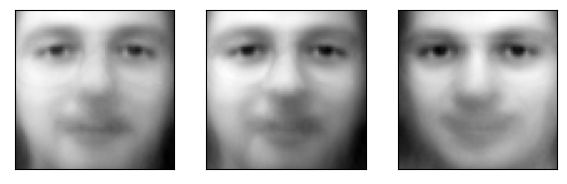

Epoch:  36 | train loss: 0.0126


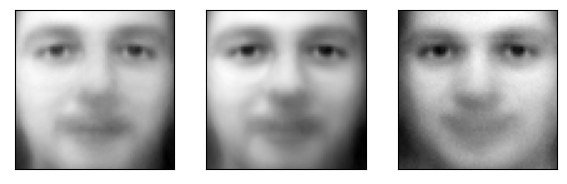

Epoch:  37 | train loss: 0.0118


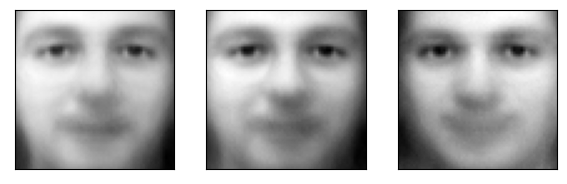

Epoch:  38 | train loss: 0.0114


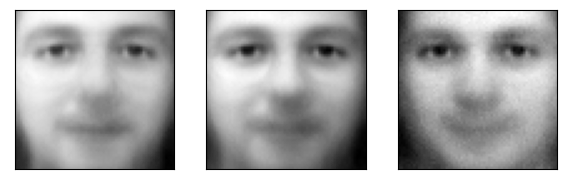

Epoch:  39 | train loss: 0.0110


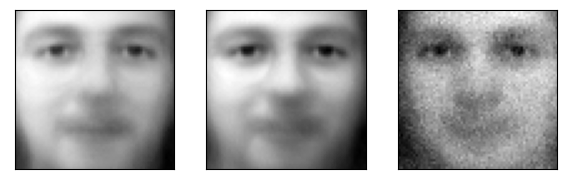

Epoch:  40 | train loss: 0.0109


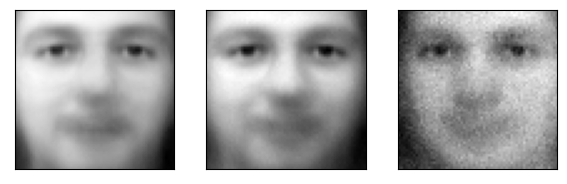

Epoch:  41 | train loss: 0.0102


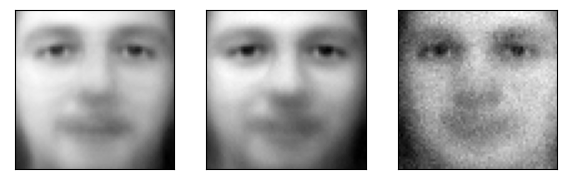

Epoch:  42 | train loss: 0.0105


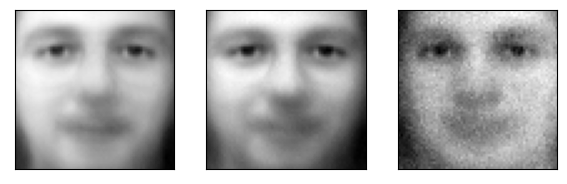

Epoch:  43 | train loss: 0.0107


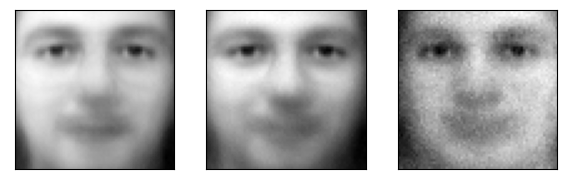

Epoch:  44 | train loss: 0.0117


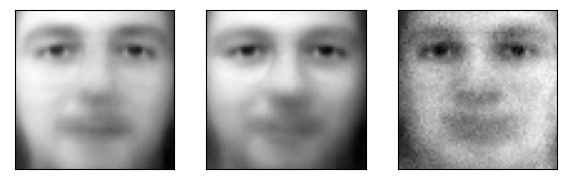

Epoch:  45 | train loss: 0.0108


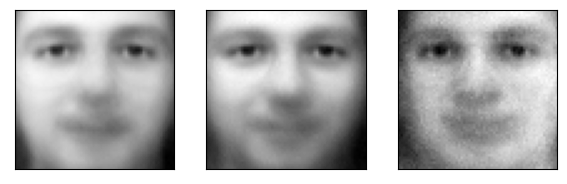

Epoch:  46 | train loss: 0.0110


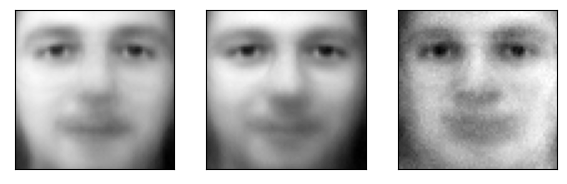

Epoch:  47 | train loss: 0.0111


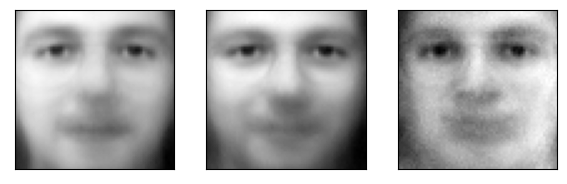

Epoch:  48 | train loss: 0.0107


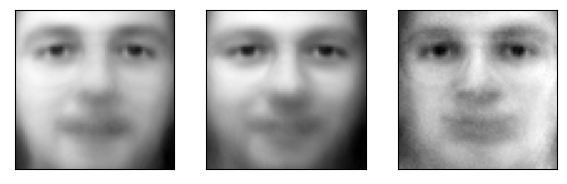

Epoch:  49 | train loss: 0.0110


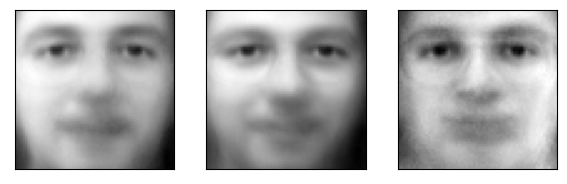

Epoch:  50 | train loss: 0.0102


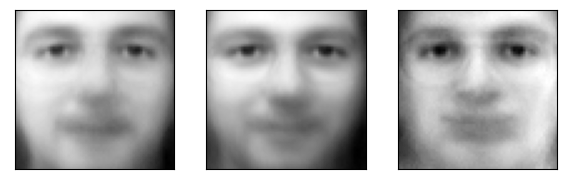

Epoch:  51 | train loss: 0.0105


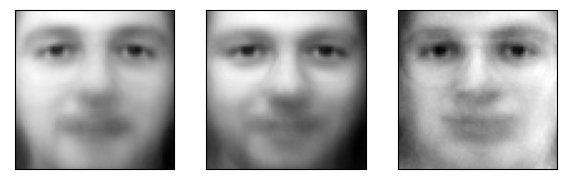

Epoch:  52 | train loss: 0.0113


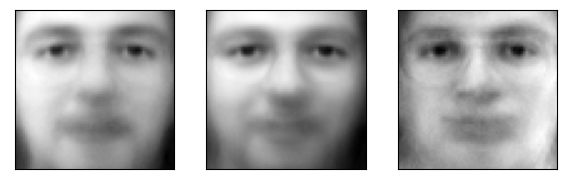

Epoch:  53 | train loss: 0.0104


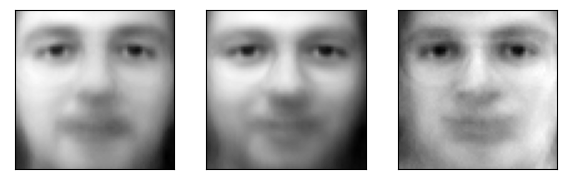

Epoch:  54 | train loss: 0.0102


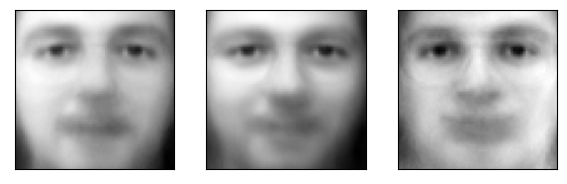

Epoch:  55 | train loss: 0.0105


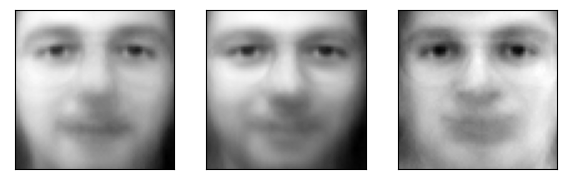

Epoch:  56 | train loss: 0.0109


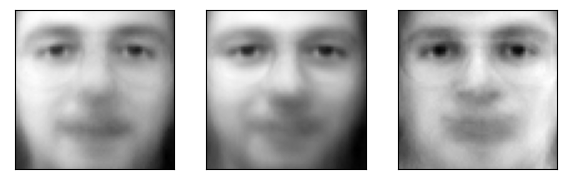

Epoch:  57 | train loss: 0.0102


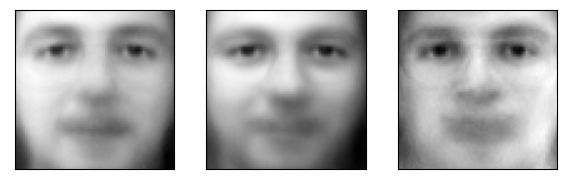

Epoch:  58 | train loss: 0.0113


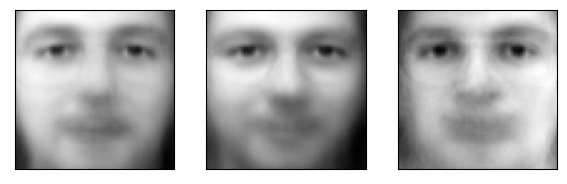

Epoch:  59 | train loss: 0.0101


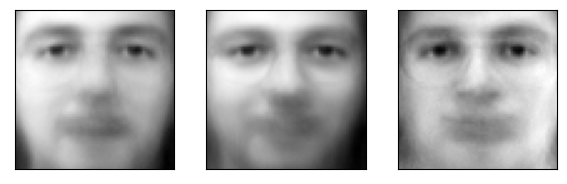

Epoch:  60 | train loss: 0.0102


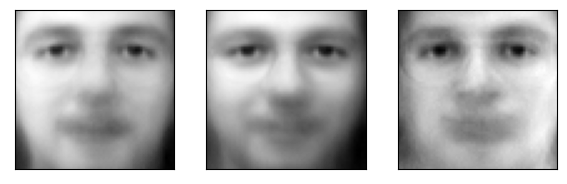

Epoch:  61 | train loss: 0.0100


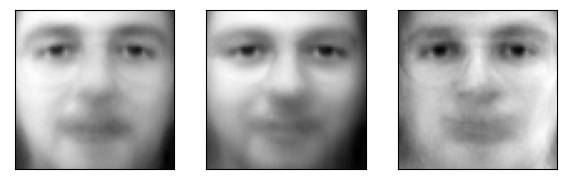

Epoch:  62 | train loss: 0.0105


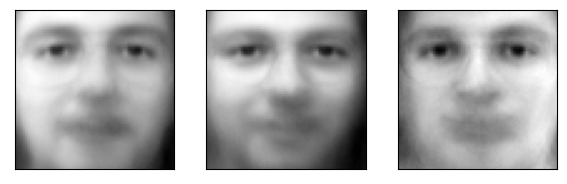

Epoch:  63 | train loss: 0.0101


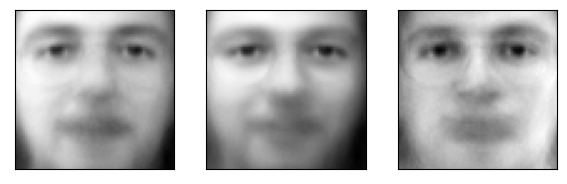

Epoch:  64 | train loss: 0.0103


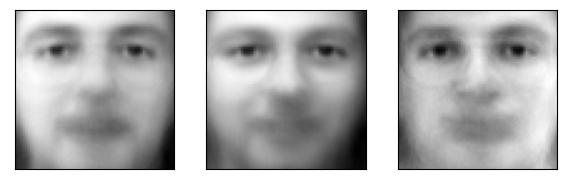

Epoch:  65 | train loss: 0.0102


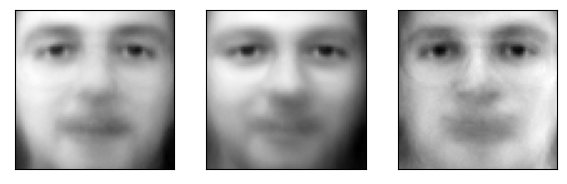

Epoch:  66 | train loss: 0.0107


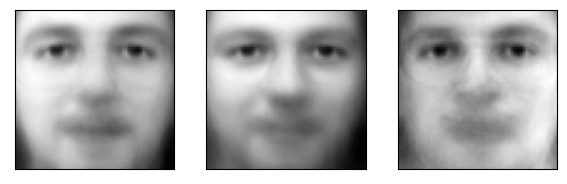

Epoch:  67 | train loss: 0.0105


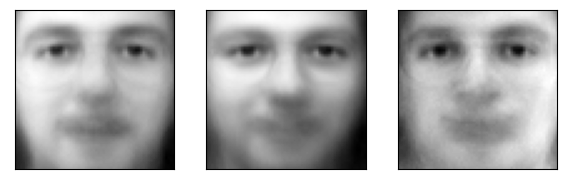

Epoch:  68 | train loss: 0.0101


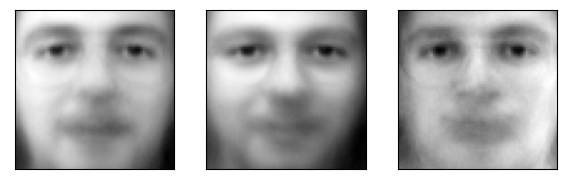

Epoch:  69 | train loss: 0.0102


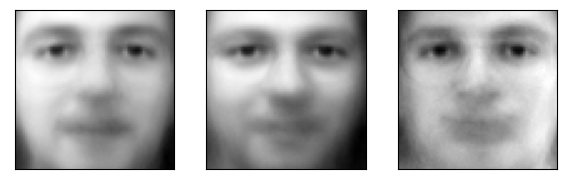

Epoch:  70 | train loss: 0.0107


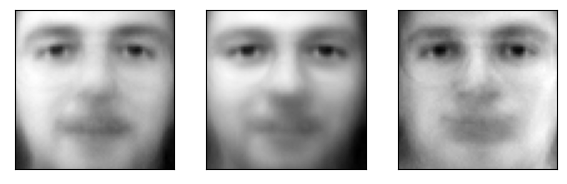

Epoch:  71 | train loss: 0.0109


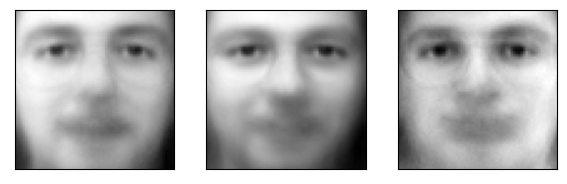

Epoch:  72 | train loss: 0.0108


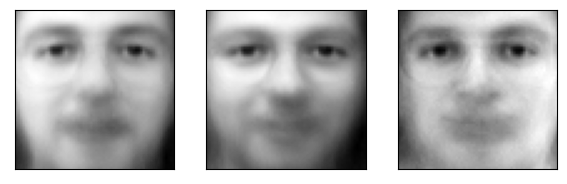

Epoch:  73 | train loss: 0.0104


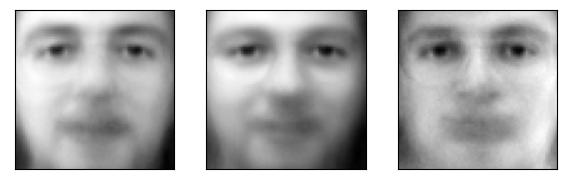

Epoch:  74 | train loss: 0.0106


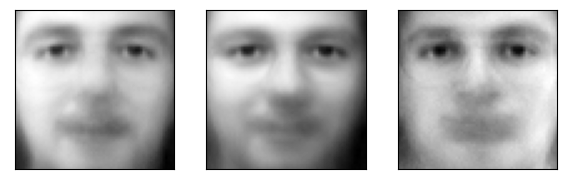

Epoch:  75 | train loss: 0.0108


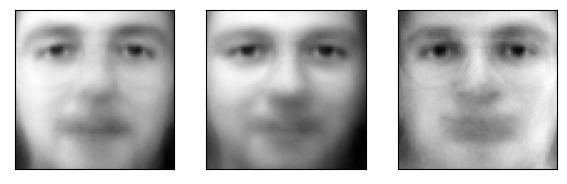

Epoch:  76 | train loss: 0.0108


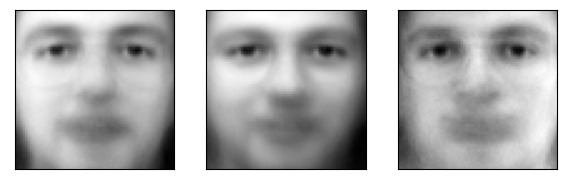

Epoch:  77 | train loss: 0.0098


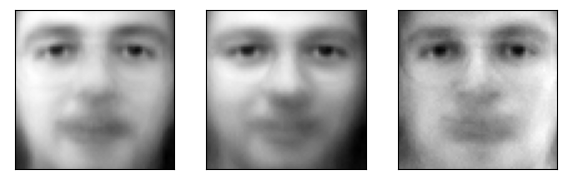

Epoch:  78 | train loss: 0.0106


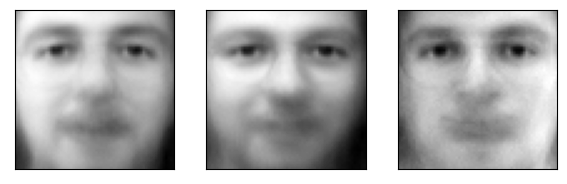

Epoch:  79 | train loss: 0.0106


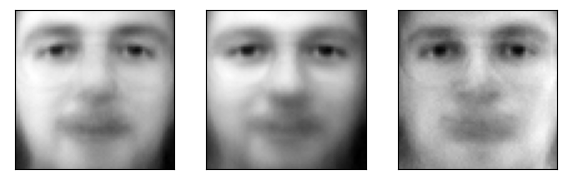

Epoch:  80 | train loss: 0.0098


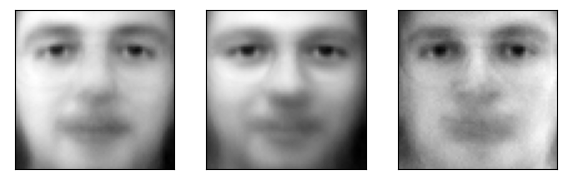

Epoch:  81 | train loss: 0.0103


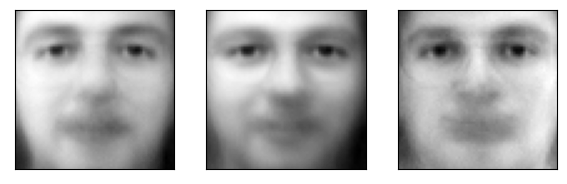

Epoch:  82 | train loss: 0.0103


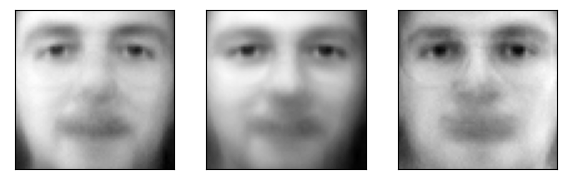

Epoch:  83 | train loss: 0.0102


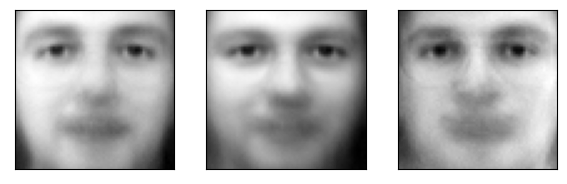

Epoch:  84 | train loss: 0.0095


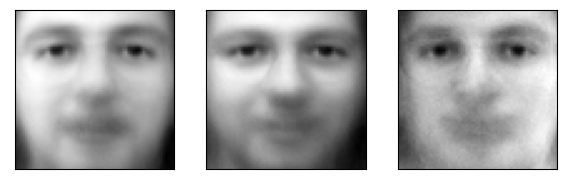

Epoch:  85 | train loss: 0.0097


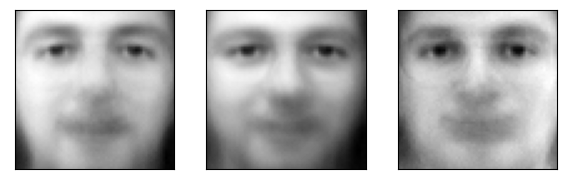

Epoch:  86 | train loss: 0.0094


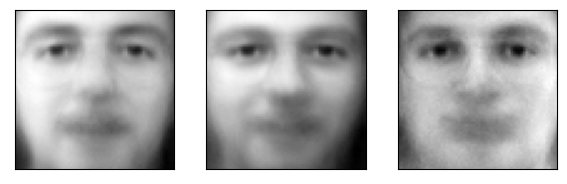

Epoch:  87 | train loss: 0.0100


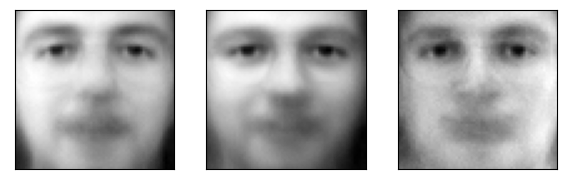

Epoch:  88 | train loss: 0.0106


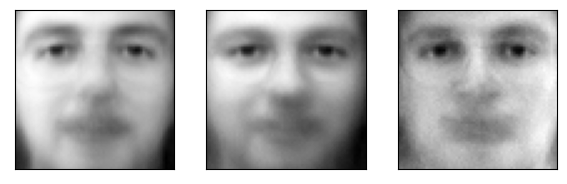

Epoch:  89 | train loss: 0.0097


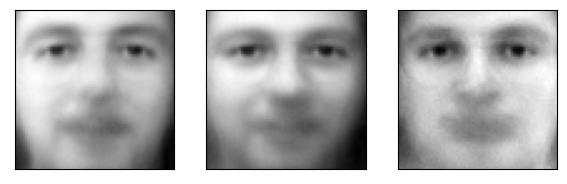

Epoch:  90 | train loss: 0.0098


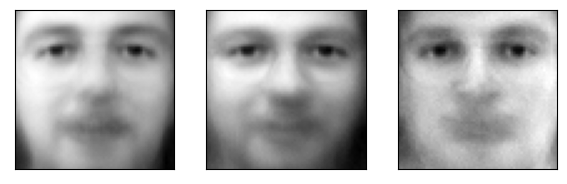

Epoch:  91 | train loss: 0.0100


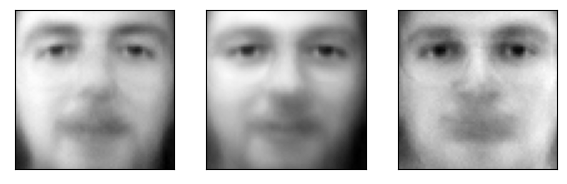

Epoch:  92 | train loss: 0.0100


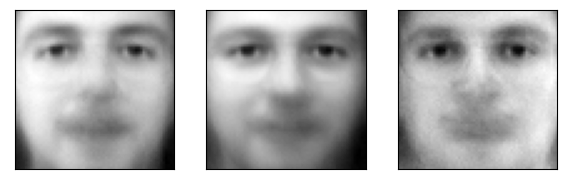

Epoch:  93 | train loss: 0.0098


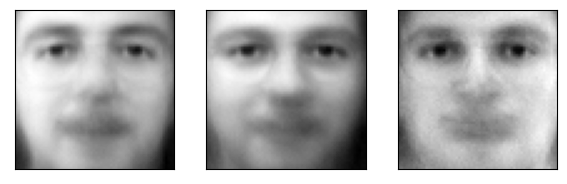

Epoch:  94 | train loss: 0.0099


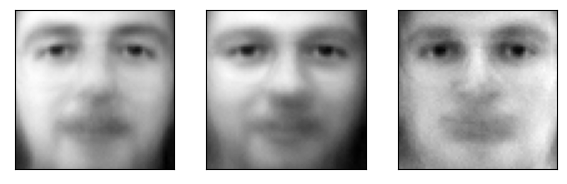

Epoch:  95 | train loss: 0.0096


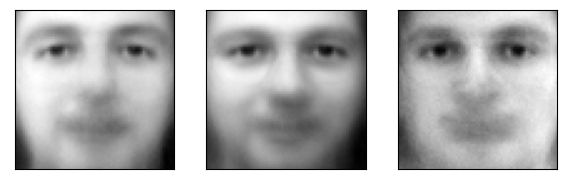

Epoch:  96 | train loss: 0.0098


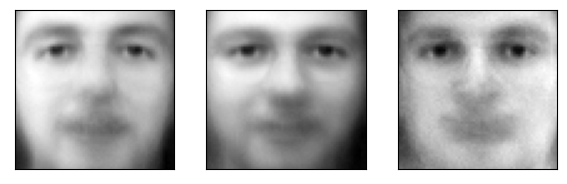

Epoch:  97 | train loss: 0.0097


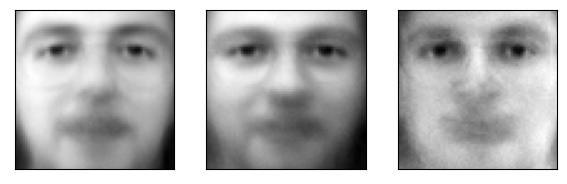

Epoch:  98 | train loss: 0.0100


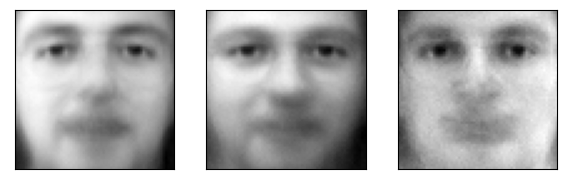

Epoch:  99 | train loss: 0.0094


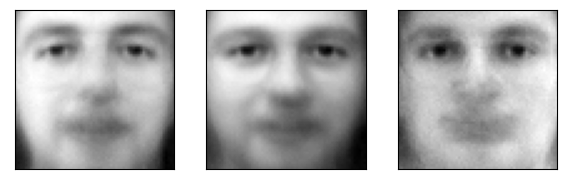

In [18]:
for epoch in range(n_epochs):
    for step, batch_x in enumerate(train_loader):

        encoded, decoded = autoencoder(batch_x)

        loss = loss_func(decoded, batch_x)      # mean square error
        optimizer.zero_grad()               # clear gradients for this training step
        loss.backward()                     # backpropagation, compute gradients
        optimizer.step()                    # apply gradients

        if step % 100 == 0:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy())

            # plotting decoded image (second row)
            _, decoded_data = autoencoder(view_data)
            
            plot_data(decoded_data)

/var/folders/mf/c97bxvzj3nb6q2v_7q3pw7k40000gn/T/ipykernel_41393/1798409539.py:14: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, azim=60, elev=30)


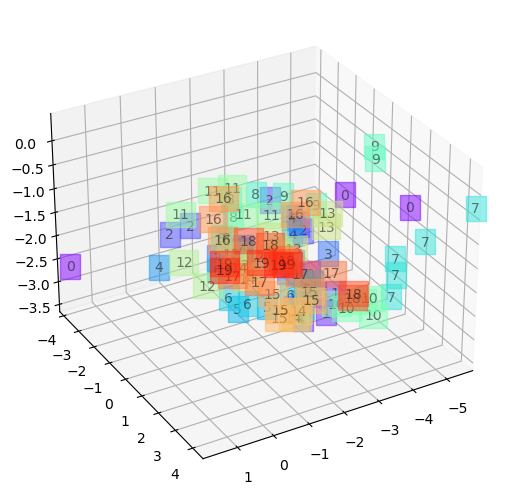

In [19]:
# visualize in 3D plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


XX = np.vstack([data['data'][np.where(data['target'] == l)[0][:5]] for l in range(20)])
YY = np.concatenate([data['target'][np.where(data['target'] == l)[0][:5]] for l in range(20)])


view_data = tt.FloatTensor(XX)
encoded_data, _ = autoencoder(view_data)

fig = plt.figure(2)
ax = Axes3D(fig, azim=60, elev=30)
X, Y, Z = encoded_data.data[:, 0].numpy(), encoded_data.data[:, 1].numpy(), encoded_data.data[:, 2].numpy()

values = YY

for x, y, z, s in zip(X, Y, Z, values):
    c = cm.rainbow(int(255*s/20), alpha=0.5)
    ax.text(x, y, z, s, backgroundcolor=c, alpha=0.5)
#     ax.scatter(x,y,z, label=s)

    
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(Z.min(), Z.max())
plt.show()